In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import json

# Opening JSON file
f = open('/kaggle/input/airbnb-oslo/dataset_airbnb-scraper-task_2023-03-05_12-31-25-883.json')

# returns JSON object as
# a dictionary
data = json.load(f)

# Closing file
f.close()


In [3]:
data[1]['reviews']

[{'author': {'firstName': 'Maurice',
   'hasProfilePic': True,
   'id': '1025773',
   'pictureUrl': 'https://a0.muscache.com/im/pictures/user/cbcdc9a2-c973-4344-830c-9b4d2af187ce.jpg?aki_policy=profile_x_medium',
   'smartName': 'Maurice',
   'thumbnailUrl': 'https://a0.muscache.com/im/pictures/user/cbcdc9a2-c973-4344-830c-9b4d2af187ce.jpg?aki_policy=profile_small'},
  'comments': 'This is an excellent location house and very cool inside. But it’s only half as house has been segregated into 2 as well as separate basement. It’s 3 places. <br/><br/>The host was very good and helped a lot <br/><br/>It was 36 C in Oslo when we were there and so the portable fan was awesome !',
  'createdAt': '2019-07-29T12:11:40Z',
  'id': '498038399',
  'collectionTag': None,
  'rating': 5,
  'recipient': {'firstName': 'Jojo',
   'hasProfilePic': True,
   'id': '126866822',
   'pictureUrl': 'https://a0.muscache.com/im/pictures/user/f2279753-21fa-42d9-bc19-7b97c5c41c17.jpg?aki_policy=profile_x_medium',
   

In [4]:
data[1]['reviews'][1]['comments']


'Very nice house in a very nice location, with a very nice host. Perfect!'

In [5]:
data[3]['reviews'][1]['localizedReview']['comments']

'Fantastic farm! Wish we had time for more than 3 days, because here you can probably thrive for a long time:)<br/><br/>Hope to come back another time!'

#### Extract reviews from listings in Oslo, Norway

In [6]:
#%%timeit -n 200

reviews = [] #NoneType list to store comments

for i in range(len(data)):
    if data[i]['reviews'] == []:
        pass
    else: #only use reviews fields which have data
        for u in data[i]['reviews']:
            #use english translations of comments wherever available.
            h = u['localizedReview'] 
            if h == None: 
                pass #some fo the comments doesn't have a translation, lets pass trough these ones
            else:
                reviews.append(h['comments'])
    

In [7]:
df = pd.DataFrame(reviews, columns=['reviews']) #Transform into DataFrame
df

,reviews
0,Fantastic farm! Wish we had time for more than...
1,"Friendly, helpful and available hosting. Amazi..."
2,We had an amazing stay at Galtebo farm. The fa...
3,Absolutely amazing place.
4,16 out of 16 guests were delighted. We regrett...
...,...
56,"Superb apartment, impeccably clean, very comfo..."
57,An amazing home in the middle of Oslo!
58,Really beautiful Marius and very kind state an...
59,Good area. Nice neighbors. <br/>Very close to ...


In [8]:
dftest = df.copy() #Make a copy of the dataset

In [9]:
dftest['reviews'] = dftest['reviews'].str.replace('<br/>', '') #Drop this symbol that repeated in some comments
dftest['reviews'] = dftest['reviews'].str.replace('\W+', ' ', regex=True) #Drop all signs
dftest

,reviews
0,Fantastic farm Wish we had time for more than ...
1,Friendly helpful and available hosting Amazing...
2,We had an amazing stay at Galtebo farm The far...
3,Absolutely amazing place
4,16 out of 16 guests were delighted We regrette...
...,...
56,Superb apartment impeccably clean very comfort...
57,An amazing home in the middle of Oslo
58,Really beautiful Marius and very kind state an...
59,Good area Nice neighbors Very close to public ...


In [10]:
import spacy
import nltk
import en_core_web_sm
from nltk import word_tokenize
import nltk

In [11]:
nlp = en_core_web_sm.load() #Import English language

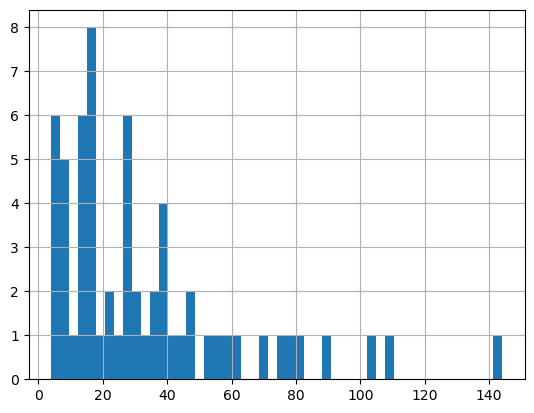

In [12]:
words_per_review = dftest.reviews.apply(lambda x: len(x.split(" "))) #Reviews nombers of words
words_per_review.hist(bins = 50)
plt.show()

In [13]:
words_per_review.mean() #Mean of words per review

33.21311475409836

In [14]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

11109


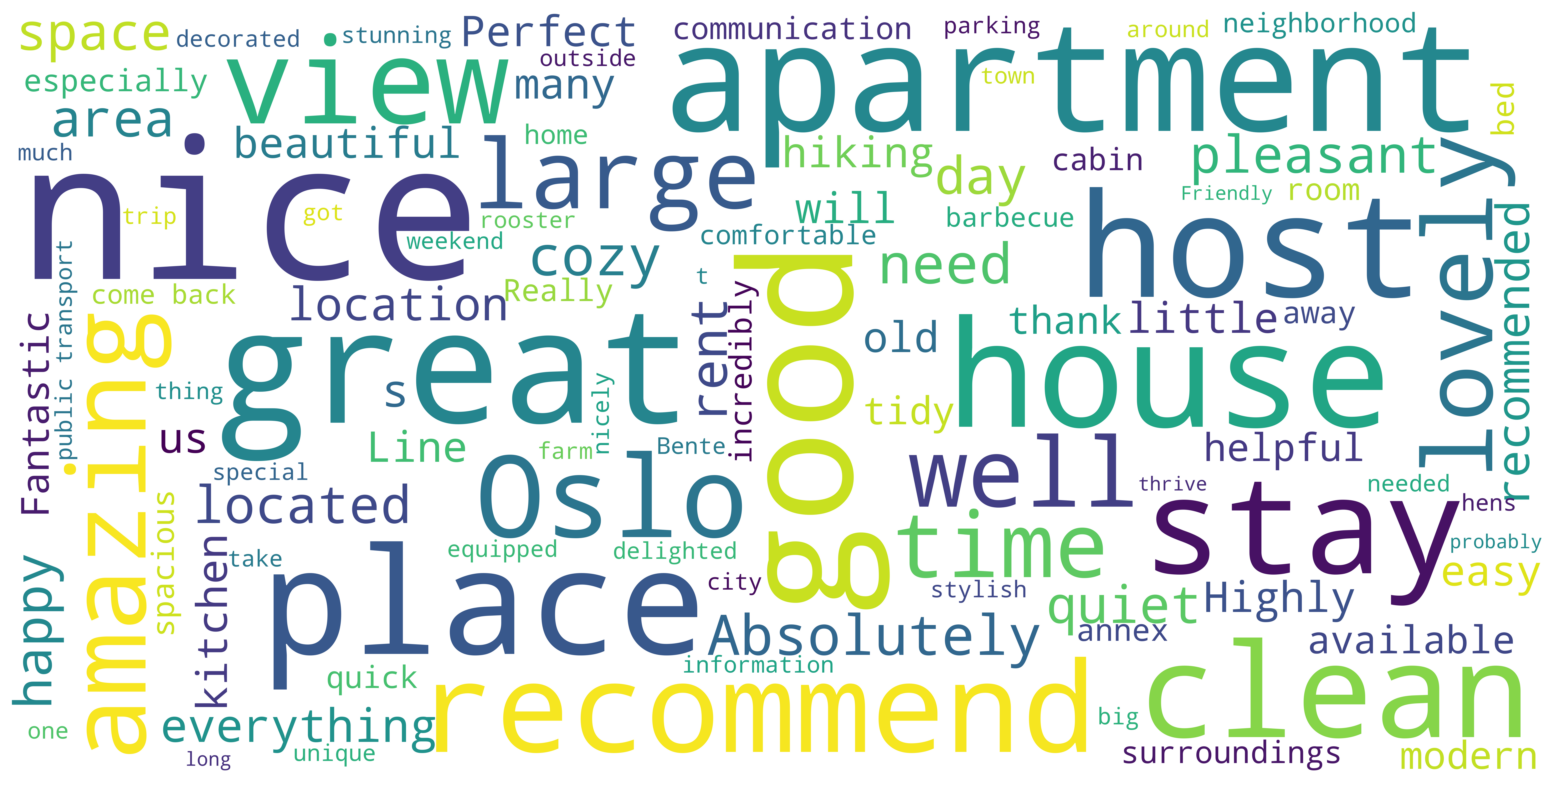

In [15]:
word_cloud_text = ''.join(dftest.reviews)
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
dftest['reviews'] = dftest.reviews.apply(lambda x: x.lower()) #Lower all our words

In [17]:
token_lists = [word_tokenize(each) for each in dftest.reviews] #Split our reviews by each words
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens before: ", len(set(tokens)))

Number of unique tokens before:  618


In [18]:
stop_words = set(stopwords.words('english')) #Drop stop words
filtered_sentence = [w for w in tokens if not w.lower() in stop_words]

In [19]:
filtered_sentence = []
for w in tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  
print('before sw', len(set(tokens)))
print('after sw', len(set(filtered_sentence))) #Comparing before the removal of stop words and after

before sw 618
after sw 536


In [20]:
one_percentile = int(len(set(filtered_sentence)) * 0.01) #Let's plot just 1% of our top words
top_1_percentile = Counter(filtered_sentence).most_common(one_percentile)
top_1_percentile[:10]

[('nice', 30), ('great', 21), ('good', 19), ('apartment', 18), ('place', 17)]

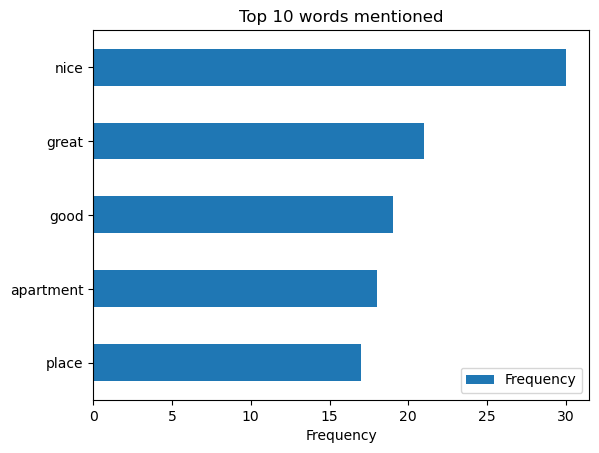

In [21]:
pd.DataFrame(top_1_percentile[:10], columns=['Words','Frequency']).set_index('Words').sort_values(by=['Frequency']).plot(kind='barh') #Plot our top 10 common words
plt.title('Top 10 words mentioned')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()